# demographic detail for each station area


In [2]:
import pandas as pd

# for spatial data
import geopandas as gpd

# for plotting
import matplotlib.pyplot as plt
# for basemaps
import contextily as ctx

import folium
from folium.plugins import MarkerCluster
import pandas as pd

import plotly.express as px

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
stationarea=gpd.read_file("stationarea.geojson")
station=gpd.read_file("stations.geojson")
ethdf=gpd.read_file("ethnicityindex.geojson")
index=gpd.read_file("iqv_average.csv")
stationarea['lon']=station.geometry.x
stationarea['lat']=station.geometry.y
tod=stationarea[stationarea['TOD']=='Yes']
ntod=stationarea[stationarea['TOD']=='No']

In [4]:
df1=ethdf.sample(10)

In [30]:
df2=gpd.overlay(stationarea,ethdf , how='intersection')

In [31]:
df2

,Station,City,Code,TOD,County,Marker,buffer_polygon,lon,lat,GEOID_left,...,Non Hispanic Asian_change,Non Hispanic Native Hawaiian and Other Pacific Islander_change,Non Hispanic Some other race_change,Non Hispanic Two or more races_change,Hispanic_change,perc_2019_sq,iqv_2019_sq,perc_2013_sq,iqv_2013_sq,geometry
0,ASHBY,Berkeley,BKY,Yes,ALA,D,"POLYGON ((563770.9742351742 4188779.586837385,...",-122.270119,37.853207,060014007001,...,42.975207,NaN,-100.0,32.894737,510.810811,2307.479503,0.879145,3570.652348,0.734783,"POLYGON ((-122.27748 37.84428, -122.27755 37.8..."
1,ASHBY,Berkeley,BKY,Yes,ALA,D,"POLYGON ((563770.9742351742 4188779.586837385,...",-122.270119,37.853207,060014007001,...,203.508772,NaN,NaN,34.666667,679.310345,2307.479503,0.879145,3824.518758,0.705769,"POLYGON ((-122.27748 37.84428, -122.27755 37.8..."
2,ASHBY,Berkeley,BKY,Yes,ALA,D,"POLYGON ((563770.9742351742 4188779.586837385,...",-122.270119,37.853207,060014008003,...,185.964912,NaN,NaN,9.333333,368.965517,4302.844903,0.651103,3824.518758,0.705769,"POLYGON ((-122.27886 37.84431, -122.28072 37.8..."
3,ASHBY,Berkeley,BKY,Yes,ALA,D,"POLYGON ((563770.9742351742 4188779.586837385,...",-122.270119,37.853207,060014007001,...,166.153846,NaN,NaN,248.275862,66.176471,2307.479503,0.879145,4007.786608,0.684824,"POLYGON ((-122.27748 37.84428, -122.27755 37.8..."
4,ASHBY,Berkeley,BKY,Yes,ALA,D,"POLYGON ((563770.9742351742 4188779.586837385,...",-122.270119,37.853207,060014008001,...,478.461538,NaN,NaN,431.034483,-25.000000,2459.353476,0.861788,4007.786608,0.684824,"POLYGON ((-122.28144 37.84704, -122.28137 37.8..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,LAKE MERRITT,Oakland,OAK,No,ALA,o,"POLYGON ((563781.1147714683 4182741.967714277,...",-122.265541,37.797679,060014287001,...,360.269360,NaN,NaN,1000.000000,1658.333333,2903.146356,0.811069,4535.080771,0.624562,"POLYGON ((-122.27545 37.79204, -122.27496 37.7..."
289,LAKE MERRITT,Oakland,OAK,No,ALA,o,"POLYGON ((563781.1147714683 4182741.967714277,...",-122.265541,37.797679,060014287001,...,22.491039,NaN,NaN,117.924528,227.131783,2903.146356,0.811069,3677.253598,0.722600,"POLYGON ((-122.27545 37.79204, -122.27496 37.7..."
290,LAKE MERRITT,Oakland,OAK,No,ALA,o,"POLYGON ((563781.1147714683 4182741.967714277,...",-122.265541,37.797679,060014287001,...,69.813665,NaN,NaN,33.526012,-19.001919,2903.146356,0.811069,2360.135667,0.873127,"POLYGON ((-122.27545 37.79204, -122.27496 37.7..."
291,LAKE MERRITT,Oakland,OAK,No,ALA,o,"POLYGON ((563781.1147714683 4182741.967714277,...",-122.265541,37.797679,060014287001,...,178.979592,NaN,NaN,670.000000,3146.153846,2903.146356,0.811069,4373.371032,0.643043,"POLYGON ((-122.27545 37.79204, -122.27496 37.7..."


In [34]:
df3.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 69 columns):
 #   Column                                                                Non-Null Count  Dtype   
---  ------                                                                --------------  -----   
 0   GEOID_left                                                            293 non-null    object  
 1   NAME_left                                                             293 non-null    object  
 2   Total_2019                                                            293 non-null    float64 
 3   Non Hispanic_2019                                                     293 non-null    float64 
 4   Non Hispanic White_2019                                               293 non-null    float64 
 5   Non Hispanic Black_2019                                               293 non-null    float64 
 6   Non Hispanic American Indian and Alaska Native_2019                   293 non-null

AttributeError: 'numpy.ndarray' object has no attribute 'axis'

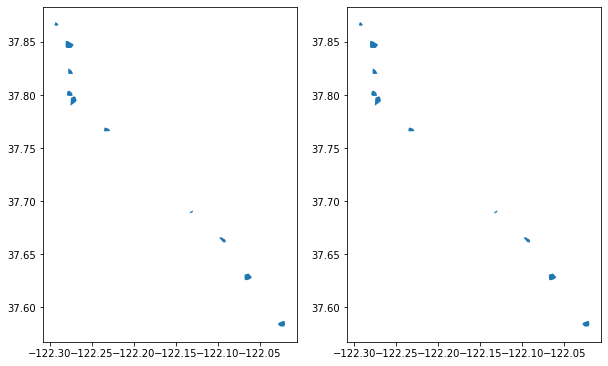

In [20]:
fig, (ax1, ax2)=plt.subplots(1,2,figsize=(10,10))
stationarea.plot(ax=ax1)
df2.plot(ax=ax2)
ax.axis('off')

